<h1>Time Series Analysis</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'Time_Series_SA.csv')
#data=pd.read_csv(r'TS_cleaned.csv')
data

,Time Period,Mortality,Breastfeeding,ITN,Punishment,Left_alone,Books,Postnatal,Youth literacy
0,2010,122.496339,41.489804,15.109220,20.780000,23.56,13.900000,26.616402,59.541673
1,2011,117.844193,30.575355,24.724580,25.933333,12.20,38.116667,36.000563,69.033840
2,2012,113.272034,32.633343,29.404337,21.120000,6.30,58.940000,55.584590,39.787730
3,2013,109.048407,40.180431,26.649457,21.912500,5.90,34.966667,49.054644,67.050230
4,2014,105.363702,44.491267,40.668224,23.410526,17.75,16.315000,65.367649,94.314060
5,2015,101.843329,45.573035,38.687500,20.685714,24.40,21.566667,44.233333,52.888017
6,2016,98.302752,49.539139,34.236364,37.712500,17.38,18.580000,58.150000,30.791610
7,2017,95.358489,42.269883,41.660000,24.000000,21.40,17.887500,71.509091,70.912450
8,2018,92.355718,41.196937,36.057143,17.250000,13.86,6.966667,72.950000,59.108025


In [3]:
data=data.set_index('Time Period')
data

,Mortality,Breastfeeding,ITN,Punishment,Left_alone,Books,Postnatal,Youth literacy
Time Period,,,,,,,,
2010,122.496339,41.489804,15.109220,20.780000,23.56,13.900000,26.616402,59.541673
2011,117.844193,30.575355,24.724580,25.933333,12.20,38.116667,36.000563,69.033840
2012,113.272034,32.633343,29.404337,21.120000,6.30,58.940000,55.584590,39.787730
2013,109.048407,40.180431,26.649457,21.912500,5.90,34.966667,49.054644,67.050230
2014,105.363702,44.491267,40.668224,23.410526,17.75,16.315000,65.367649,94.314060
2015,101.843329,45.573035,38.687500,20.685714,24.40,21.566667,44.233333,52.888017
2016,98.302752,49.539139,34.236364,37.712500,17.38,18.580000,58.150000,30.791610
2017,95.358489,42.269883,41.660000,24.000000,21.40,17.887500,71.509091,70.912450
2018,92.355718,41.196937,36.057143,17.250000,13.86,6.966667,72.950000,59.108025


In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_lag_2' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df   

In [14]:
grang=grangers_causation_matrix(data, variables = data.columns)
grang.iloc[:1]

,Mortality_lag_2,Breastfeeding_lag_2,ITN_lag_2,Punishment_lag_2,Left_alone_lag_2,Books_lag_2,Postnatal_lag_2,Youth literacy_lag_2
Mortality_y,1.0,0.0273,0.0702,0.1456,0.2329,0.0,0.6065,0.0


In [8]:
grangercausalitytests(data[['Mortality','Breastfeeding']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0460  , p=0.1414  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=4.8737  , p=0.0273  , df=1
likelihood ratio test: chi2=3.8059  , p=0.0511  , df=1
parameter F test:         F=3.0460  , p=0.1414  , df_denom=5, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4270  , p=0.7008  , df_denom=2, df_num=2
ssr based chi2 test:   chi2=2.9887  , p=0.2244  , df=2
likelihood ratio test: chi2=2.4888  , p=0.2881  , df=2
parameter F test:         F=0.4270  , p=0.7008  , df_denom=2, df_num=2


{1: ({'ssr_ftest': (3.046033773753671, 0.1413780329339971, 5.0, 1),
   'ssr_chi2test': (4.873654038005873, 0.02726969969887218, 1),
   'lrtest': (3.8059308693423404, 0.05107138041061513, 1),
   'params_ftest': (3.0460337737523457, 0.14137803293406628, 5.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4269593120397565, 0.7007908295370786, 2.0, 2),
   'ssr_chi2test': (2.9887151842782953, 0.2243927100792478, 2),
   'lrtest': (2.4888207760625853, 0.28811073159653877, 2),
   'params_ftest': (0.42695931203961435, 0.7007908295371486, 2.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
grangercausalitytests(data[['Under-five mortality rate','Punishment']], maxlag=maxlag)

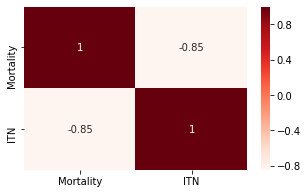

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3)) 
sns.heatmap(data[['Mortality','ITN']].corr(), annot=True, cmap="Reds") 
plt.show()